# Author:- SHARATH DINESH
## Task 6:- Prediction using Decision Tree Classifier
In this task we are going to use _IRIS DATASET_ and then applying decision tree classfier to get the output. This also works for multiclass classification.

## Importing the libraries and Dataset

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

## Loading the dataset

In [16]:
data = load_iris()
X = data.data[:,:]
y = data.target

## Data Analysis
Lets do some data analysis!!!

In [17]:
data_final = pd.DataFrame(data['data'],columns=['Petal Length','Petal Width','Sepal Length','Sepal Width'])
data_final['Species'] = data['target']
data_final['Species'] = data_final['Species'].apply(lambda x: data['target_names'][x])

data_final.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data['target_names'][0]

'setosa'

## data_final.shape

In [19]:
data_final.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the data to get some information

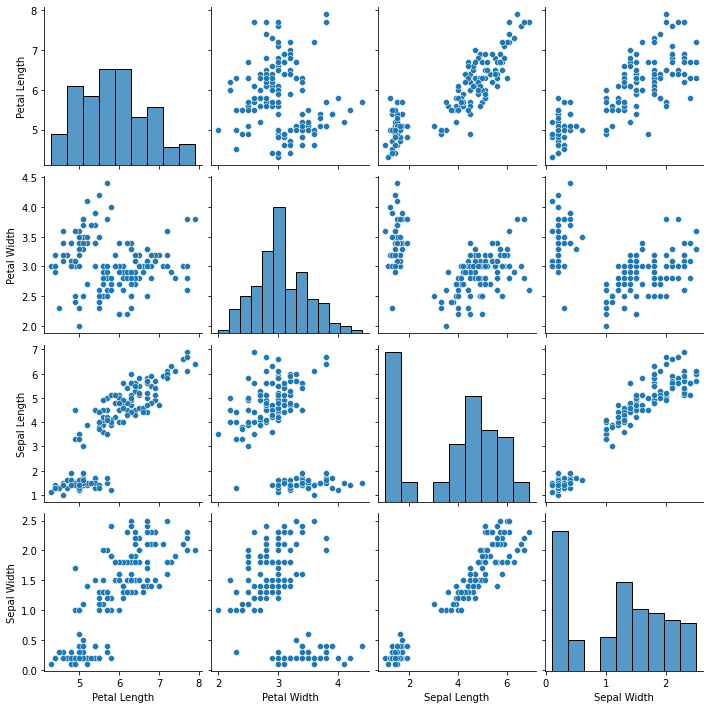

In [20]:
#input data visualization
sns.pairplot(data_final)

<Figure size 1440x1440 with 0 Axes>

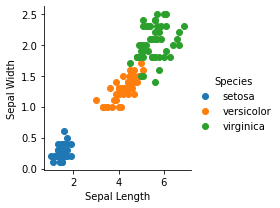

In [21]:
# Scatter plot of data based on Sepal Length and Width features
plt.figure(figsize=(20,20))
sns.FacetGrid(data_final,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

<Figure size 1440x1440 with 0 Axes>

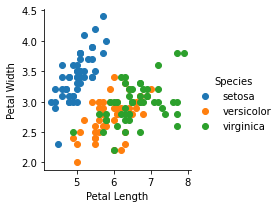

In [22]:
# Scatter plot of data based on petal Length and Width features
plt.figure(figsize=(20,20))
sns.FacetGrid(data_final,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()

## Implementing the Decision Tree Classifier

In [23]:
#Lets split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

## Lets see the prediction and the actual value then check the accuracy

In [24]:
testing = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})


In [25]:
print("Accuracy of the model: ",metrics.accuracy_score(y_test,y_pred))

Accuracy of the model:  1.0


### Hurray!!! Thats a 100% accuracy

## Visualizing the Decision Tree Classifier

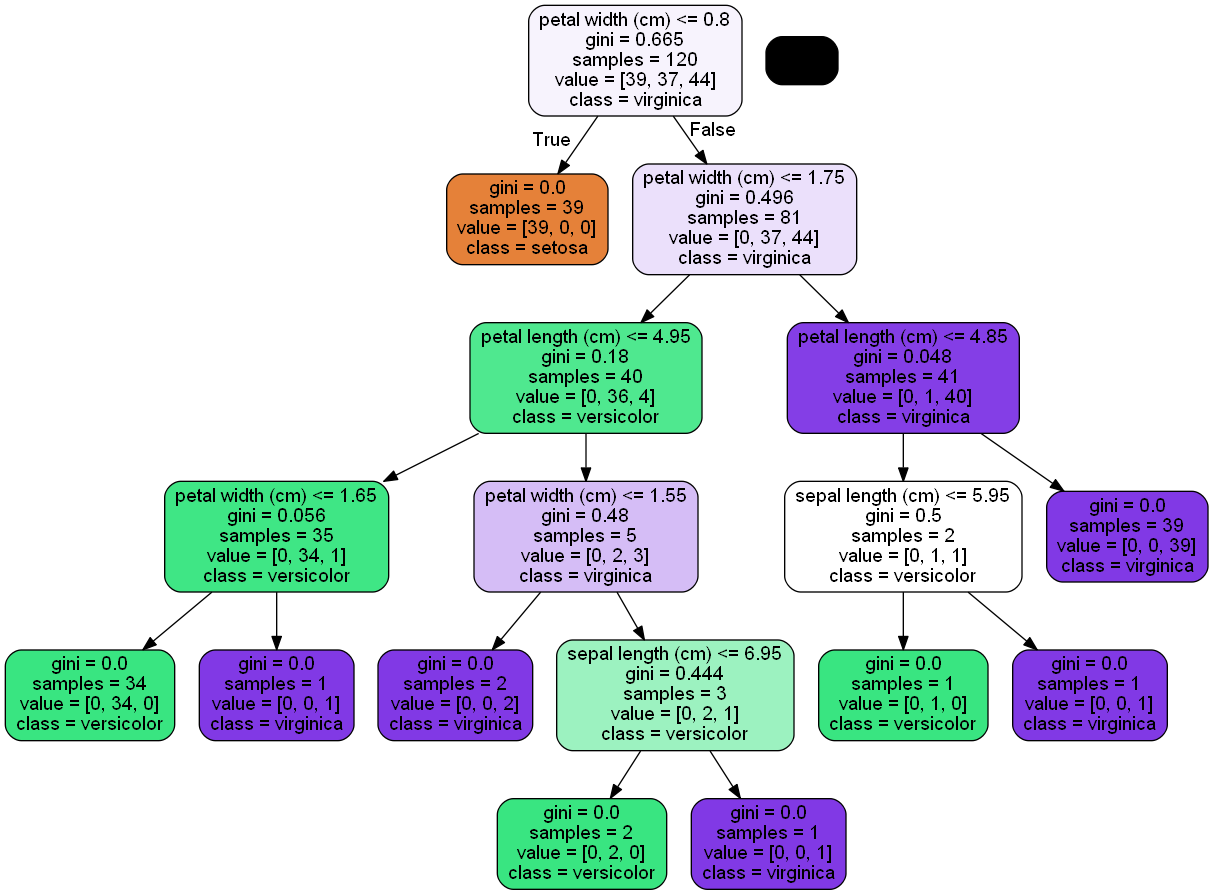

In [26]:
export_graphviz(model,out_file='decision_tree.dot',
                feature_names=data.feature_names[:],
               class_names=data.target_names,
               rounded=True,
               filled=True
               )
(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')

Image(filename='decision_tree.png')

In [27]:
# Estimating class probabilities
print("Predicting probabilities for flower whose petal length and width is 4.7cm and 3.2cm respectively and sepal length and width are 1.3cm and 0.2cm respectively.")
print()
ans = model.predict([[4.7, 3.2, 1.3, 0.2]])
print("Our model predicts the class as 0, that is,",data['target_names'][ans][0])

Predicting probabilities for flower whose petal length and width is 4.7cm and 3.2cm respectively and sepal length and width are 1.3cm and 0.2cm respectively.

Output = 0

Our model predicts the class as 0, that is, setosa


# Thats it for this _TASK_